# Mall Customer Segmentation & EDA

This project performs exploratory data analysis and clustering on mall customer data to understand spending behavior and discover actionable customer segments.

### Objectives
- Analyze demographics & spending behavior
- Visualize customer patterns and correlations
- Apply K-Means clustering to segment customers
- Produce data-driven business insights

### Dataset Columns
- CustomerID
- Gender
- Age
- Annual Income (k$)
- Spending Score (1-100)

---


## 1️⃣ Import Necessary Libraries


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,5)


## 2️⃣ Load Dataset



In [21]:
from google.colab import files
uploaded = files.upload()  # upload Mall_Customers.csv manually

df = pd.read_csv("Mall_Customers.csv")



Saving Mall_Customers.csv to Mall_Customers (2).csv


### 👁️ Preview the Dataset

In [22]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 3️⃣ Dataset Summary & Information



In [23]:
df.info()
df.describe()
df.head()
df.tail()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


## 4️⃣ Data Cleaning

In [24]:
df.columns = df.columns.str.strip().str.replace(" ", "_")


In [25]:
print("Missing values:")
print(df.isnull().sum())

print("\nDuplicates:", df.duplicated().sum())
df = df.drop_duplicates()


Missing values:
CustomerID                0
Gender                    0
Age                       0
Annual_Income_(k$)        0
Spending_Score_(1-100)    0
dtype: int64

Duplicates: 0


### 🔧 Rename Important Columns


In [26]:
df.rename(columns={
    "Annual_Income_(k$)": "Annual_Income",
    "Spending_Score_(1-100)": "Spending_Score"
}, inplace=True)


## 5️⃣ Univariate Analysis


Visualize the distribution of individual variables.



### 📈 Age Distribution


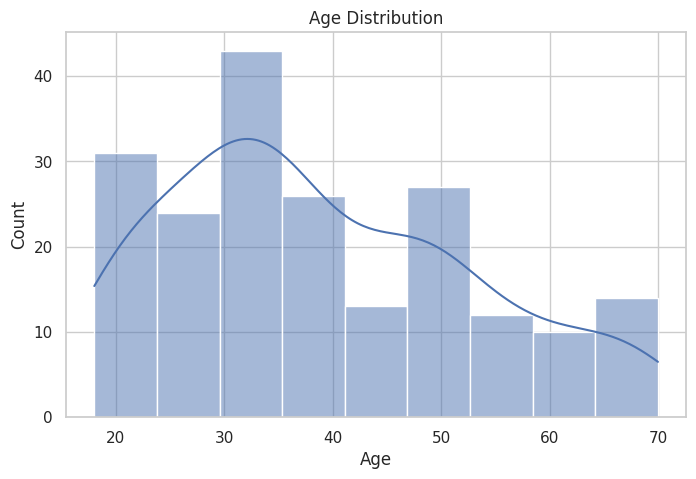

In [27]:
sns.histplot(df["Age"], kde=True)
plt.title("Age Distribution")
plt.show()


### 💰 Annual Income Distribution


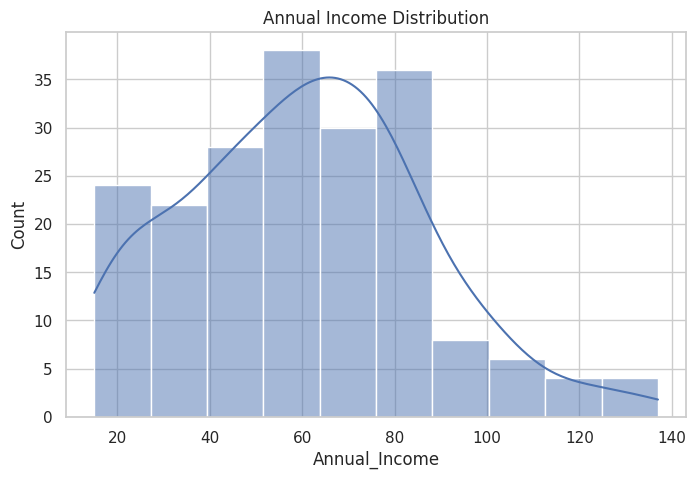

In [28]:
sns.histplot(df["Annual_Income"], kde=True)
plt.title("Annual Income Distribution")
plt.show()


### 💳 Spending Score Distribution


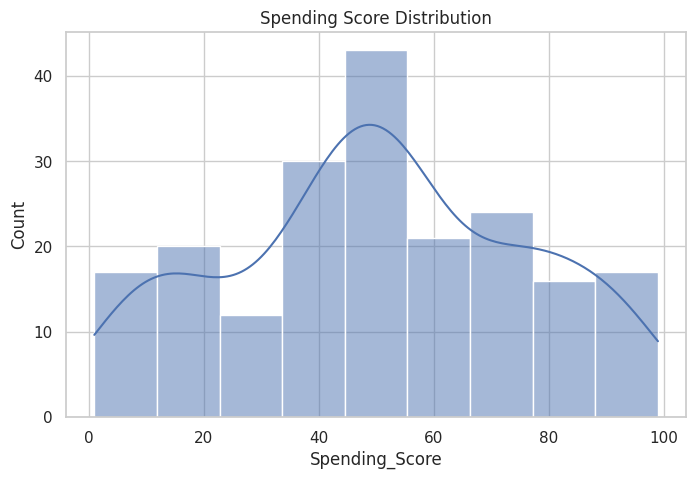

In [29]:
sns.histplot(df["Spending_Score"], kde=True)
plt.title("Spending Score Distribution")
plt.show()


## 6️⃣ Bivariate Analysis

Examine relationships between two variables.


### 💵 Annual Income vs Spending Score


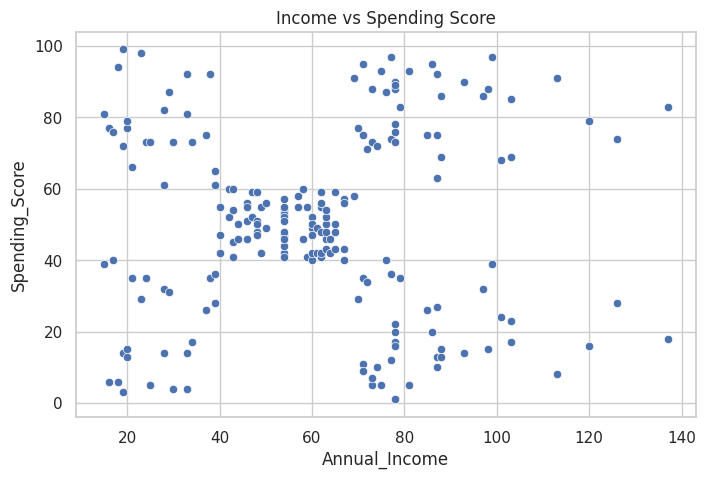

In [30]:
sns.scatterplot(data=df, x="Annual_Income", y="Spending_Score")
plt.title("Income vs Spending Score")
plt.show()


### 👤 Age vs Spending Score


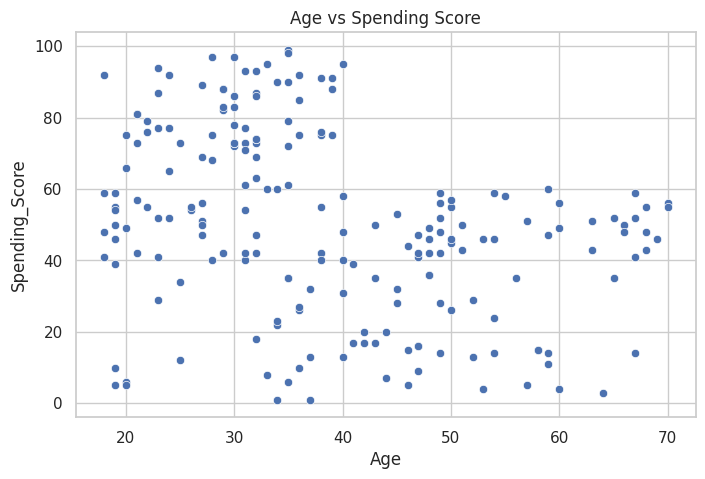

In [31]:
sns.scatterplot(data=df, x="Age", y="Spending_Score")
plt.title("Age vs Spending Score")
plt.show()


### 🚻 Gender vs Spending Score


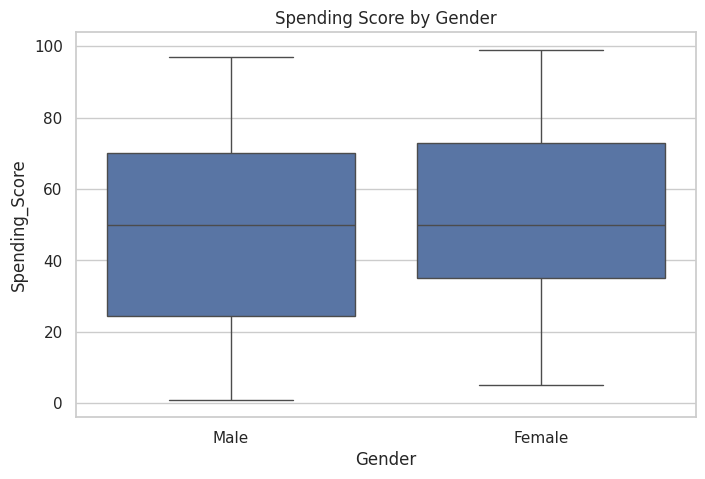

In [32]:
sns.boxplot(data=df, x="Gender", y="Spending_Score")
plt.title("Spending Score by Gender")
plt.show()


## 7️⃣ Correlation Analysis

Check correlations between numerical variables.


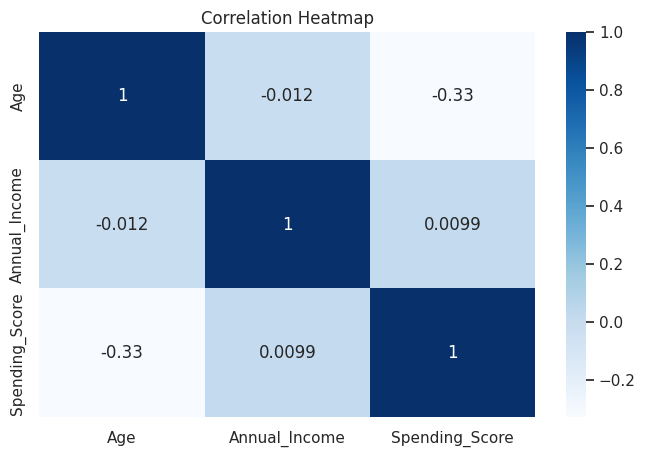

In [33]:
numeric_cols = ["Age", "Annual_Income", "Spending_Score"]
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()


## 8️⃣ Customer Segmentation with K-Means

Apply clustering to group customers based on spending behavior and income.


### 🎨 Visualize Customer Segments


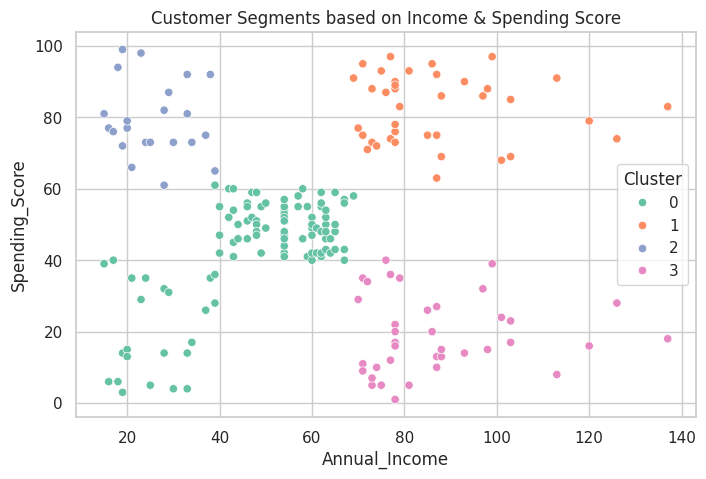

In [34]:
from sklearn.cluster import KMeans

X = df[["Annual_Income", "Spending_Score"]]

kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X)

sns.scatterplot(data=df, x="Annual_Income", y="Spending_Score", hue="Cluster", palette="Set2")
plt.title("Customer Segments based on Income & Spending Score")
plt.show()


In [35]:
cluster_summary = df.groupby("Cluster")[["Age", "Annual_Income", "Spending_Score"]].mean()
cluster_summary


,Age,Annual_Income,Spending_Score
Cluster,,,
0,43.603960,48.168317,43.396040
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,40.394737,87.000000,18.631579


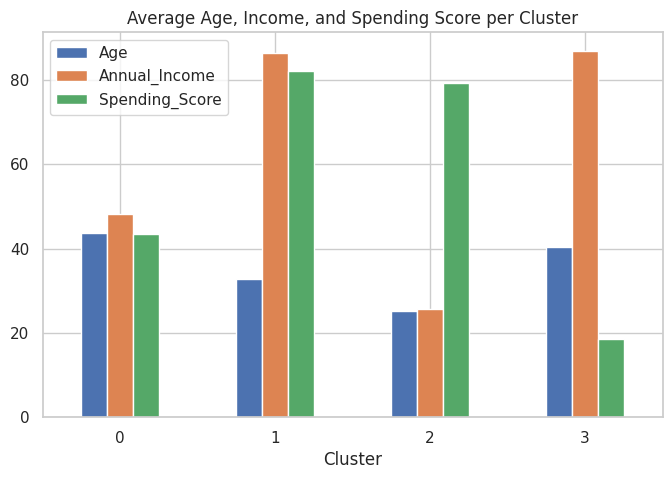

In [36]:
cluster_summary.plot(kind="bar")
plt.title("Average Age, Income, and Spending Score per Cluster")
plt.xticks(rotation=0)
plt.show()


## 9️⃣ Insights & Business Recommendations



### 👥 Age Distribution

•	Most customers are between 20–40 years old

•	Demand gradually decreases after age 40

•	Very few customers above 60 → mall mainly attracts younger & working-age adults

🟦 Business takeaway: Focus marketing campaigns on young professionals and millennials.


### 💰 Annual Income Distribution

•	Income ranges mostly between 30k–85k

•	A bonus group of high earners (100k+) exists but is small

🟦 Business takeaway: Upsell opportunities exist for the small high–income segment.


### 💳 Spending Score Distribution

•	Spending score distribution is wide and forms two clusters:

      o	Low spenders

      o	High spenders

•	Many middle-range shoppers

🟦 Business takeaway: Customers differ significantly in spending style → segmentation is necessary.


### 💵 Income vs Spending Score

•	No strong linear relationship

•	High income does not guarantee high spending

•	Several high–income low–spending customers are visible

🟦 Opportunity: Introduce premium loyalty offers to convert wealthy low–spending shoppers.


### 👨‍🦰 Gender vs Spending Score

•	Both genders have a similar median spending

•	Females show slightly higher spending trend, but differences are moderate

🟦 Conclusion: Gender does not dictate spending — avoid gender–based promotion assumptions.


### 📈 Correlation Analysis

| Feature Pair       | Correlation | Meaning                                |
| ------------------ | ----------- | -------------------------------------- |
| Age vs Spending    | **-0.33**   | Older customers tend to spend **less** |
| Income vs Spending | ~0.00       | No direct relationship                 |
| Age vs Income      | ~0.00       | Independent variables                  |

🟦 Conclusion: Age influences spending patterns more than income.

### 🎯 Customer Segmentation (KMeans)

4 key clusters identified:

| Segment   | Profile                      | Spending | Strategy                                 |
| --------- | ---------------------------- | -------- | ---------------------------------------- |
| Cluster 1 | High income – High spenders  | ⭐ High   | VIP perks, exclusive benefits            |
| Cluster 2 | High income – Low spenders   | ❗ Low    | targeted promotions, personalized offers |
| Cluster 3 | Middle income – Mid spenders | ✅ Medium | loyalty programs, bundles                |
| Cluster 4 | Low income – Low spenders    | 🔻 Low   | budget-friendly offers, discount days    |



### 💼 Business Recommendations

✔️ Target high–income low–spending customers with premium service incentives

✔️ Create tiered loyalty programs to nurture mid–spenders

✔️ Expand marketing toward ages 20–40 group

✔️ Personalize campaigns rather than gender–based segmentation

✔️ Offer youth promotions (students, young professionals)

## ✅ Conclusion

This project analyzed mall customer data to uncover behavior patterns and spending characteristics.  
Through exploratory data analysis and clustering, we identified four distinct customer groups, each with unique spending behavior and marketing opportunities.

### 🚀 Next Steps
- Build a Power BI / Tableau dashboard
- Test additional clustering techniques (GMM / DBSCAN)
- Deploy a Streamlit app for interactive segmentation

---

### 👨‍💻 Author
**Ilias Georgakopoulos**  
Mathematician | Bioinformatician | Data Analyst  
